In [1]:
import pandas as pd

# Uncomment this line if using this notebook locally
# insurance = pd.read_csv('./data/insurance/insurance.csv') 

file_name = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/insurance.csv"
insurance = pd.read_csv(file_name)

# Preview our data
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


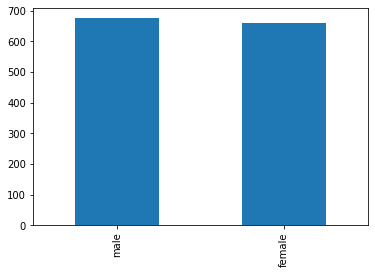

In [4]:
insurance['sex'].value_counts().plot(kind='bar')

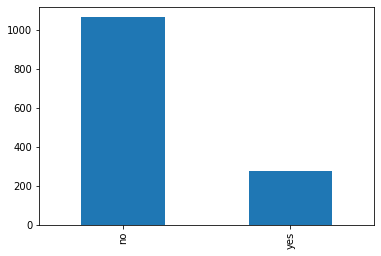

In [5]:
insurance['smoker'].value_counts().plot(kind='bar')

In [6]:
insurance.drop(["region"], axis=1, inplace=True) 
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [7]:
# Changing binary categories to 1s and 0s
insurance['sex'] = insurance['sex'].map(lambda s :1  if s == 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1  if s == 'yes' else 0)

insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [8]:
X = insurance.drop(['charges'], axis = 1)
y = insurance.charges

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)
print(regressor.score(X_train, y_train_pred))
print(regressor.score(X_test, y_test))
print(regressor.score(X_test, y_test_pred))


1.0
0.7865108093853883
1.0


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [27]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)
print(multiple_linear_reg.score(X_train, y_pred_MLR_train))
print(multiple_linear_reg.score(X_test, y_test))
print(multiple_linear_reg.score(X_test, y_pred_MLR_test))

1.0
0.7612593032585871
1.0


In [ ]:
#np.set_printoptions(precision=2)
print(np.concatenate((y_pred_MLR_train.reshape(len(y_pred),1), y_pred_MLR_test.reshape(len(y_test),1)),1))

In [ ]:
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)


In [20]:
X = insurance.iloc[:,:-1].values
y = insurance.iloc[:, -1].values
print(X)
print(y)

[[19.    1.   27.9   0.    1.  ]
 [18.    0.   33.77  1.    0.  ]
 [28.    0.   33.    3.    0.  ]
 ...
 [18.    1.   36.85  0.    0.  ]
 [21.    1.   25.8   0.    0.  ]
 [61.    1.   29.07  0.    1.  ]]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)